In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [5]:
dt=pd.read_csv(r'/content/Data annotation1.csv')

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         112 non-null    float64
 1   Gender      112 non-null    object 
 2   Location    112 non-null    object 
 3   Soundtype   112 non-null    object 
 4   Diagnosis   112 non-null    object 
 5   Unnamed: 5  2 non-null      float64
 6   Unnamed: 6  2 non-null      float64
dtypes: float64(3), object(4)
memory usage: 8.5+ KB


In [7]:
dt.drop(['Unnamed: 5','Unnamed: 6'],axis = 1 ,inplace= True)

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        112 non-null    float64
 1   Gender     112 non-null    object 
 2   Location   112 non-null    object 
 3   Soundtype  112 non-null    object 
 4   Diagnosis  112 non-null    object 
dtypes: float64(1), object(4)
memory usage: 6.1+ KB


In [9]:
dt.isnull().sum()


Age          42
Gender       42
Location     42
Soundtype    42
Diagnosis    42
dtype: int64

In [10]:
dt.dropna(inplace = True)
dt.isnull().sum()

Age          0
Gender       0
Location     0
Soundtype    0
Diagnosis    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [12]:
dt['Gender'] = dt.Gender.astype('category').cat.codes



In [13]:
dt['Location'] = dt.Location.astype('category').cat.codes

In [14]:
dt['Soundtype'] = dt.Soundtype.astype('category').cat.codes

In [15]:
dt['Diagnosis'] = dt.Diagnosis.astype('category').cat.codes
dt.head()

,Age,Gender,Location,Soundtype,Diagnosis
0,70.0,1,4,7,0
1,52.0,0,5,3,0
2,50.0,0,5,7,0
3,72.0,0,8,4,6
4,71.0,1,8,6,5


In [16]:
dt.corr()

,Age,Gender,Location,Soundtype,Diagnosis
Age,1.000000,-0.236211,0.068088,-0.233578,0.126391
Gender,-0.236211,1.000000,-0.221485,0.091175,-0.051010
Location,0.068088,-0.221485,1.000000,-0.037029,0.074059
Soundtype,-0.233578,0.091175,-0.037029,1.000000,0.013588
Diagnosis,0.126391,-0.051010,0.074059,0.013588,1.000000


<Axes: >

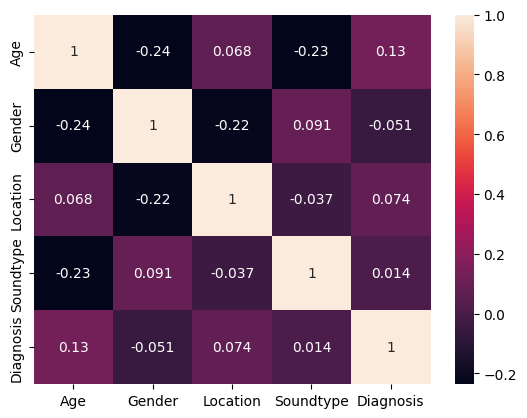

In [17]:
sns.heatmap(dt.corr(),annot = True)

In [18]:
dt.drop(['Gender'],axis = 1, inplace = True)



In [19]:
x = dt.drop(['Diagnosis'],axis = 1)
y = pd.DataFrame(dt['Diagnosis'])

<Axes: >

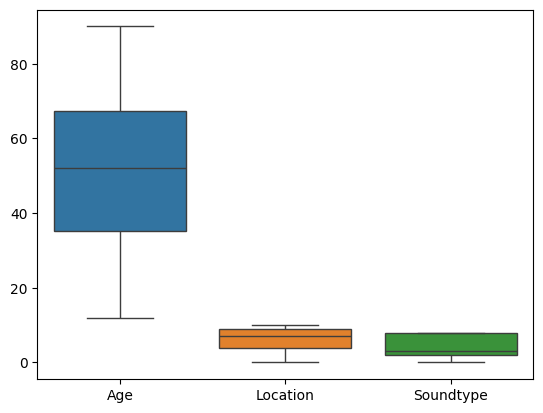

In [20]:
sns.boxplot(data = x)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
mm = MinMaxScaler(feature_range = (1,5))
xsc = sc.fit_transform(x)
xmm = mm.fit_transform(x)

<Axes: >

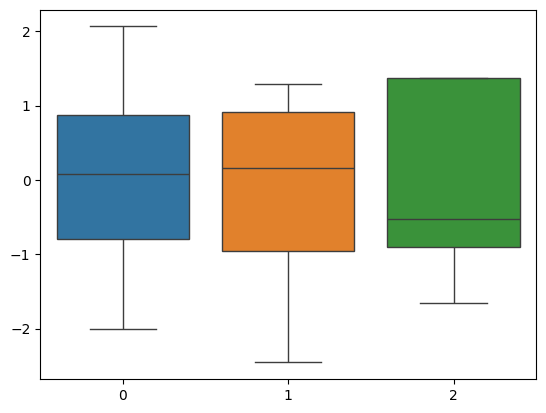

In [22]:
sns.boxplot(data = xsc)

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [24]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(84, 3)
(28, 3)
(84, 1)
(28, 1)


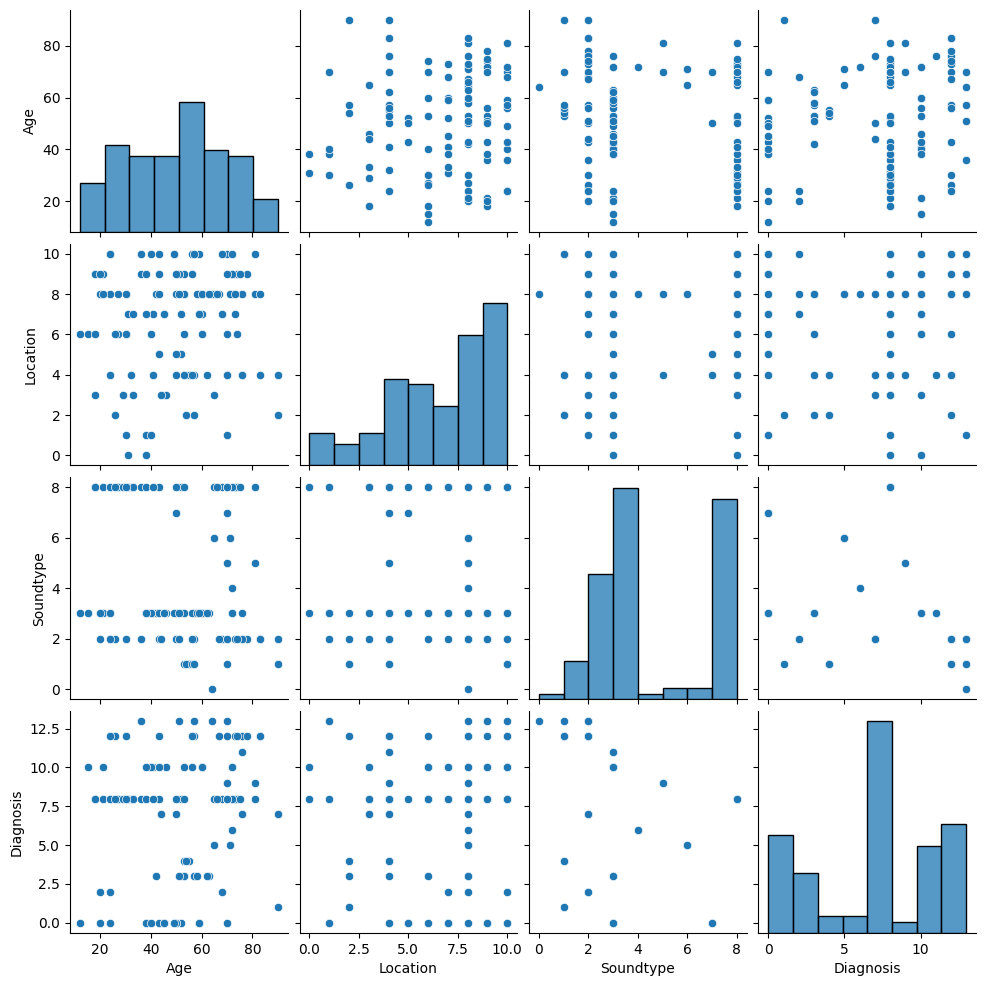

In [25]:
sns.pairplot(dt)

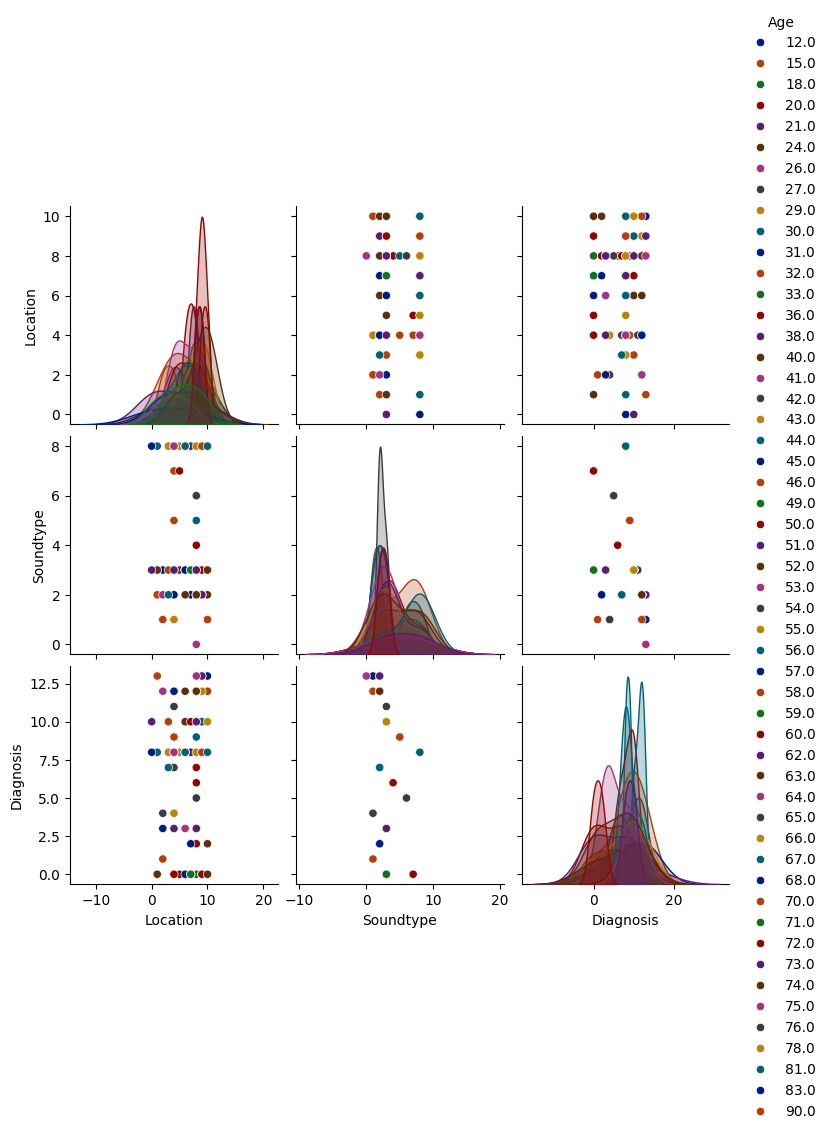

In [26]:
sns.pairplot(data = dt, hue='Age', palette='dark')

<Axes: xlabel='Age', ylabel='Diagnosis'>

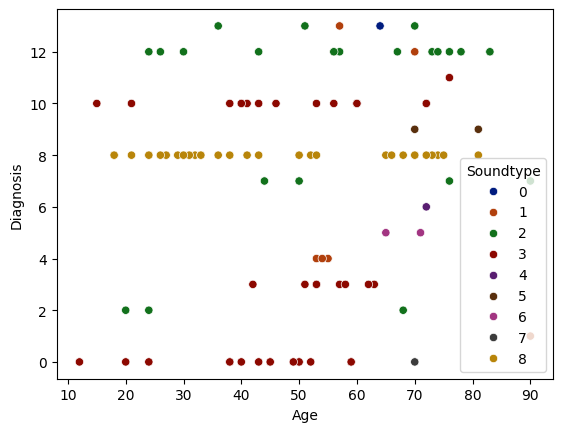

In [27]:
sns.scatterplot(data = dt, x = 'Age', y = 'Diagnosis', hue = 'Soundtype', palette='dark')

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [29]:
ypred = nb.predict(xtest)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(ytest, nb.predict(xtest)))
print(accuracy_score(ytest, nb.predict(xtest)))
print(classification_report(ytest, nb.predict(xtest)))


[[1 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0]
 [0 0 2 0 0 0 0 2 0 0]
 [0 4 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 1 0]]
0.42857142857142855
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           2       0.00      0.00      0.00         0
           3       0.25      1.00      0.40         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         8
          10       0.67      0.50      0.57         4
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         3

    accuracy                           0.43        28
   macro avg       0.21      0.28      0.22        28
weighted avg       0.41      0.43      0.41  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [31]:
confidence_scores = nb.predict_proba(xtest)

In [32]:
for i, scores in enumerate(confidence_scores[:5]):
    print(f"Sample {i+1}:")
    for class_index, score in enumerate(scores):
        print(f"  Class {class_index}: {score:.4f}")

Sample 1:
  Class 0: 0.0008
  Class 1: 0.0000
  Class 2: 0.9948
  Class 3: 0.0000
  Class 4: 0.0000
  Class 5: 0.0000
  Class 6: 0.0000
  Class 7: 0.0000
  Class 8: 0.0000
  Class 9: 0.0000
  Class 10: 0.0000
  Class 11: 0.0000
  Class 12: 0.0023
  Class 13: 0.0021
Sample 2:
  Class 0: 0.0009
  Class 1: 0.0000
  Class 2: 0.9976
  Class 3: 0.0000
  Class 4: 0.0000
  Class 5: 0.0000
  Class 6: 0.0000
  Class 7: 0.0000
  Class 8: 0.0000
  Class 9: 0.0000
  Class 10: 0.0000
  Class 11: 0.0000
  Class 12: 0.0015
  Class 13: 0.0000
Sample 3:
  Class 0: 1.0000
  Class 1: 0.0000
  Class 2: 0.0000
  Class 3: 0.0000
  Class 4: 0.0000
  Class 5: 0.0000
  Class 6: 0.0000
  Class 7: 0.0000
  Class 8: 0.0000
  Class 9: 0.0000
  Class 10: 0.0000
  Class 11: 0.0000
  Class 12: 0.0000
  Class 13: 0.0000
Sample 4:
  Class 0: 0.0000
  Class 1: 0.0000
  Class 2: 0.0000
  Class 3: 0.0000
  Class 4: 0.0000
  Class 5: 0.0000
  Class 6: 0.0000
  Class 7: 0.0000
  Class 8: 1.0000
  Class 9: 0.0000
  Class 10: 

In [35]:
a = nb.predict([[70,4,7]])
print("Diagnosis: ",a[0])

Diagnosis:  0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [36]:
import pickle as pkl
pkl.dump(nb,open('model.pkl','wb'))